In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/MESTRADO/2022 - S2/Implementação - Artigo AINA/Dataset/urldata-1000.csv'

In [4]:
data = pd.read_csv(dataset, encoding='ISO-8859-1')
data.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,https://www.apple.com/,apple.com,0,0,0,0,0,0,0,0,...,0,1,0,0,46.916667,0.493860,0.778458,0.745666,0.733955,0
1,https://www.google.com/,google.com,0,0,0,0,0,0,0,0,...,0,131,0,0,4.777778,0.281046,0.559656,0.644860,0.480392,0
2,https://www.youtube.com/,youtube.com,0,0,0,0,0,0,0,0,...,0,131,0,0,8.166667,0.742424,0.786508,0.840659,0.863636,0
3,https://www.blogger.com/about/?bpli=1,blogger.com,0,0,0,1,0,0,0,0,...,0,4,0,0,13.466667,0.961905,0.967277,0.965217,0.980952,0
4,https://www.microsoft.com/pt-br/,microsoft.com,0,0,0,1,0,0,1,0,...,0,115,0,0,34.888889,0.392010,0.793991,0.869983,0.572468,0


In [5]:
#Checking the shape of the dataset
data.shape

(1000, 32)

In [6]:
#Listing the features of the dataset
data.columns

Index(['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL',
       'expirationDateSSL', 'startDateSSL', 'validCert', 'subjectAltNameSSL',
       'subjectNameSSL', 'issuerNameSSL', 'mean_degree', 'density',
       'avg_clustering', 'transitivity', 'network_efficiency', 'Label'],
      dtype='object')

In [7]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1000 non-null   object 
 1   Domain              999 non-null    object 
 2   Have_IP             1000 non-null   int64  
 3   Have_At             1000 non-null   int64  
 4   URL_Length          1000 non-null   int64  
 5   URL_Depth           1000 non-null   int64  
 6   Redirection         1000 non-null   int64  
 7   https_Domain        1000 non-null   int64  
 8   TinyURL             1000 non-null   int64  
 9   Prefix/Suffix       1000 non-null   int64  
 10  DNS_Record          1000 non-null   int64  
 11  Web_Traffic         1000 non-null   int64  
 12  Domain_Age          1000 non-null   int64  
 13  Domain_End          1000 non-null   int64  
 14  iFrame              1000 non-null   int64  
 15  Mouse_Over          1000 non-null   int64  
 16  Right_C

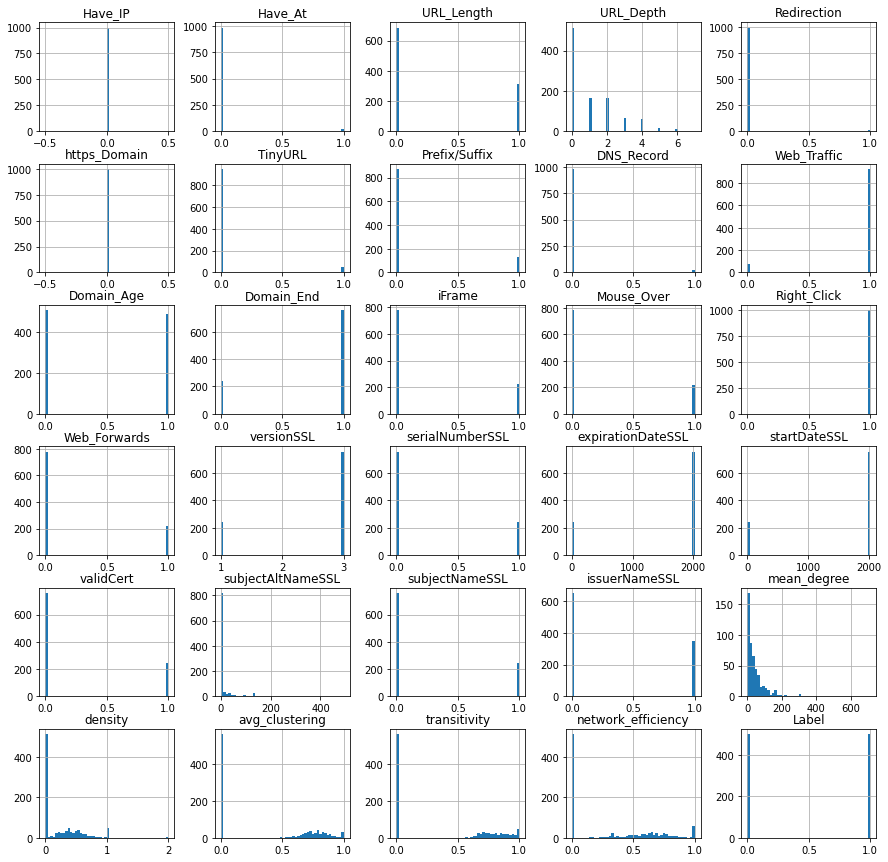

In [8]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

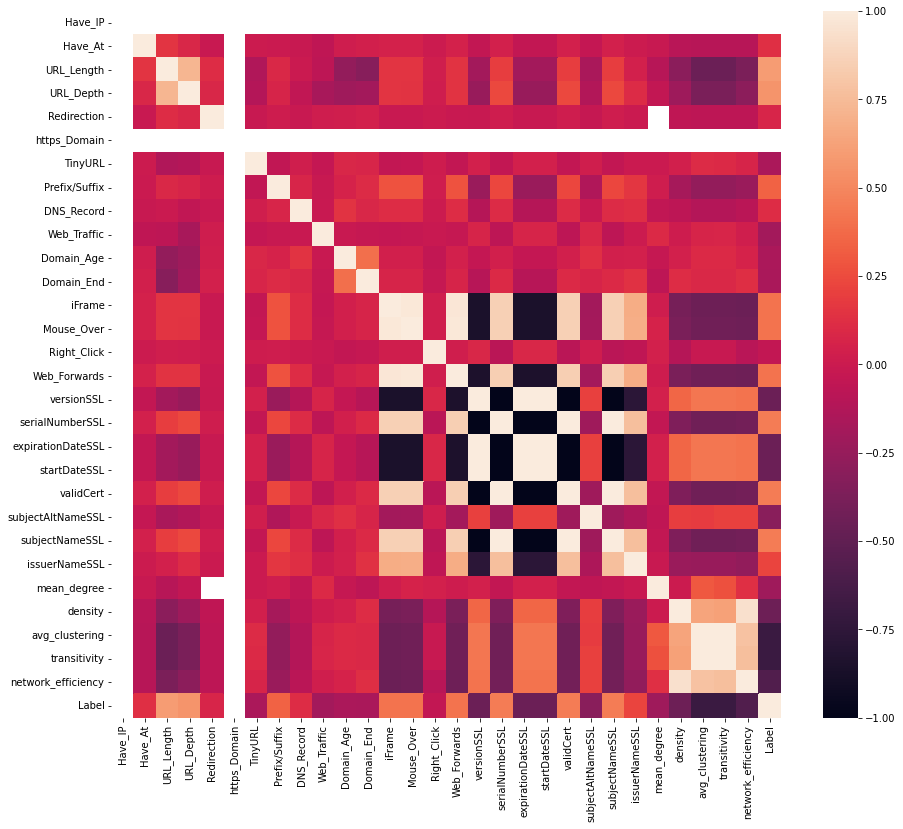

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
sns.set(font_scale = 1) # tamanho da fonte do gráfico
#plt.show()

#figure = a.get_figure()    
plt.savefig('correlation-matrix.pdf', bbox_inches='tight')

In [10]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,491.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.0,0.016000,0.313000,1.093000,0.006000,0.0,0.053000,0.12700,0.02000,0.927000,...,0.242000,14.621000,0.242000,0.350000,45.326827,0.249239,0.340440,0.355954,0.310483,0.50000
std,0.0,0.125538,0.463946,1.449984,0.077266,0.0,0.224146,0.33314,0.14007,0.260267,...,0.428509,36.567397,0.428509,0.477208,62.465692,0.320694,0.393708,0.410678,0.351706,0.50025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,1.000000,0.000000,0.000000,8.708333,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,2.000000,0.000000,0.000000,27.127273,0.000000,0.000000,0.000000,0.000000,0.50000
75%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,6.000000,0.000000,1.000000,58.577785,0.460101,0.753414,0.779456,0.635911,1.00000
max,0.0,1.000000,1.000000,7.000000,1.000000,0.0,1.000000,1.00000,1.00000,1.000000,...,1.000000,493.000000,1.000000,1.000000,712.280624,2.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
#Dropping the Domain column
data = data.drop(['url', 'Domain'], axis = 1).copy()

In [12]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP                 0
Have_At                 0
URL_Length              0
URL_Depth               0
Redirection             0
https_Domain            0
TinyURL                 0
Prefix/Suffix           0
DNS_Record              0
Web_Traffic             0
Domain_Age              0
Domain_End              0
iFrame                  0
Mouse_Over              0
Right_Click             0
Web_Forwards            0
versionSSL              0
serialNumberSSL         0
expirationDateSSL       0
startDateSSL            0
validCert               0
subjectAltNameSSL       0
subjectNameSSL          0
issuerNameSSL           0
mean_degree           509
density                 0
avg_clustering          0
transitivity            0
network_efficiency      0
Label                   0
dtype: int64

In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,0,0,0,0,0,0,0,1,0,1,...,1,1,1,1,NaN,0.000000,0.00000,0.000000,0.000000,1
1,0,0,1,2,0,0,0,0,0,1,...,0,3,0,0,NaN,0.000000,0.00000,0.000000,0.000000,1
2,0,0,1,1,0,0,0,0,0,1,...,1,1,1,1,NaN,0.000000,0.00000,0.000000,0.000000,1
3,0,0,0,0,0,0,1,0,0,1,...,0,59,0,0,76.280303,0.290039,0.73334,0.766438,0.537832,0
4,0,0,1,2,0,0,0,0,0,1,...,0,3,0,0,NaN,0.000000,0.00000,0.000000,0.000000,1


In [14]:
data['mean_degree'] = data['mean_degree'].fillna(0)

In [15]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,0,0,0,0,0,0,0,1,0,1,...,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0,0,1,2,0,0,0,0,0,1,...,0,3,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0,0,1,1,0,0,0,0,0,1,...,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0,0,0,0,0,0,1,0,0,1,...,0,59,0,0,76.280303,0.290039,0.733340,0.766438,0.537832,0
4,0,0,1,2,0,0,0,0,0,1,...,0,3,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,2,0,0,0,0,0,1,...,0,5,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
996,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,31.058201,0.165203,0.678558,0.647971,0.460401,0
997,0,0,0,0,0,0,0,0,0,1,...,0,2,0,1,66.902655,0.597345,0.723291,0.741167,0.762089,0
998,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,38.622951,0.643716,0.854061,0.886542,0.783333,1


In [16]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 29), (1000,))

In [17]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((700, 29), (300, 29))

In [18]:
#importing packages
from sklearn.metrics import accuracy_score

In [19]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [20]:
import datetime
import time

**1. Decision Tree Classifier**

In [21]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
tree.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.004971 seconds


In [22]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.004709 seconds


In [23]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9500
Decision Tree: Accuracy on test Data: 0.9000


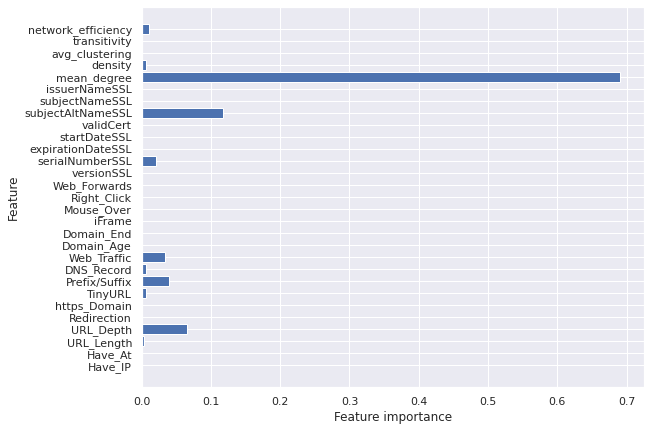

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
cm = confusion_matrix(y_test,y_test_tree)
cm

array([[131,  14],
       [ 16, 139]])

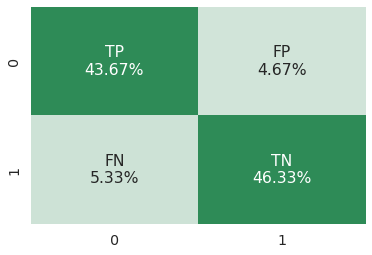

In [28]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('1-cenario-matriz-decisiontree.pdf', bbox_inches='tight')

In [29]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_tree, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8912    0.9034    0.8973       145
class 1: phishing     0.9085    0.8968    0.9026       155

         accuracy                         0.9000       300
        macro avg     0.8998    0.9001    0.8999       300
     weighted avg     0.9001    0.9000    0.9000       300



In [30]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score, accuracy_score

In [31]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_tree)
test_ap = average_precision_score(y_test,y_test_tree)
test_ac = accuracy_score(y_test, y_test_tree.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9001
Test Average Precision Score = 0.8680
Test Accuracy Score = 0.9000


In [32]:
fpr, tpr, thresholds = roc_curve(y_test_tree, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_tree, y_test)
auc_roc = auc(fpr, tpr)

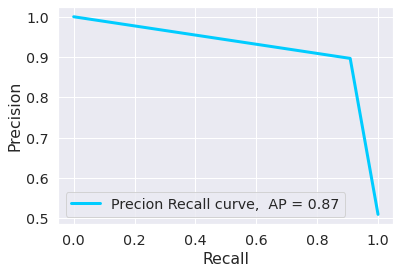

In [33]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-decision-tree.pdf', bbox_inches='tight')

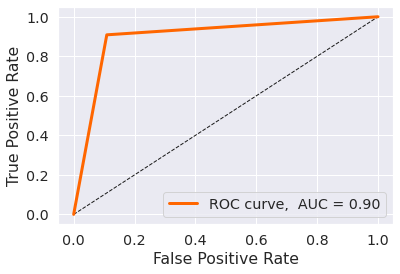

In [34]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('1-cenario-roc-decision-tree.pdf', bbox_inches='tight')

**2. Random Forest Classifier**

In [35]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
forest.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.154125 seconds


In [36]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.045199 seconds


In [37]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.4f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.4f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9357
Random forest: Accuracy on test Data: 0.8967


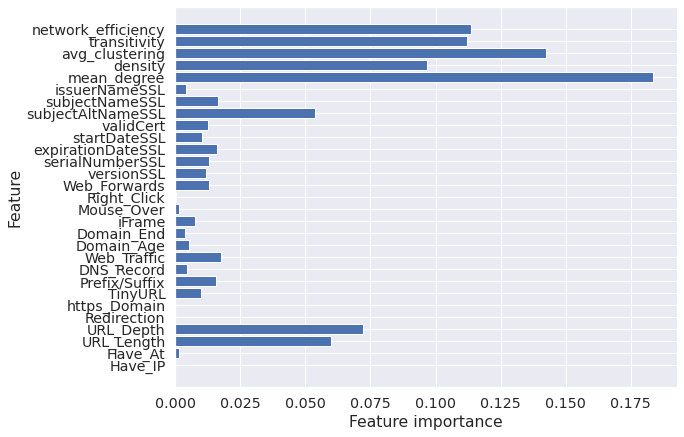

In [38]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [39]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [40]:
cm = confusion_matrix(y_test,y_test_forest)
cm

array([[121,  24],
       [  7, 148]])

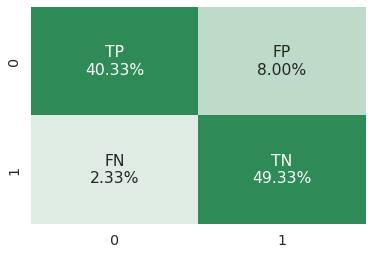

In [41]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('1-cenario-matriz-randomforest.pdf', bbox_inches='tight')

In [42]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_forest, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9453    0.8345    0.8864       145
class 1: phishing     0.8605    0.9548    0.9052       155

         accuracy                         0.8967       300
        macro avg     0.9029    0.8947    0.8958       300
     weighted avg     0.9015    0.8967    0.8961       300



In [43]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_forest)
test_ap = average_precision_score(y_test,y_test_forest)
test_ac = accuracy_score(y_test, y_test_forest.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8947
Test Average Precision Score = 0.8449
Test Accuracy Score = 0.8967


In [44]:
fpr, tpr, thresholds = roc_curve(y_test_forest, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_forest, y_test)
auc_roc = auc(fpr, tpr)

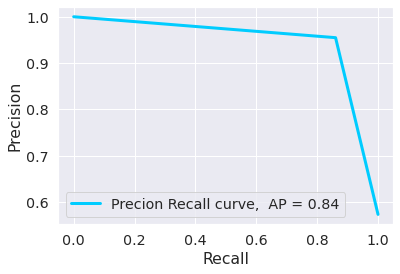

In [45]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
  
plt.savefig('pr-random-forest.pdf', bbox_inches='tight')

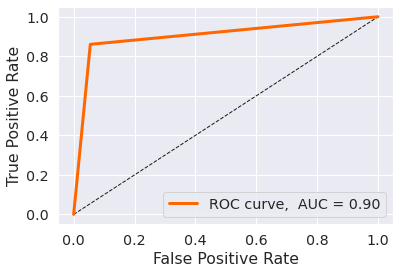

In [46]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('1-cenario-roc-random-forest.pdf', bbox_inches='tight')

**3. Multilayer Perceptrons (MLPs)**

In [47]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# get the start datetime
st = datetime.datetime.now()

# fit the model 
mlp.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.325862 seconds


In [48]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.012257 seconds


In [49]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.4f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.4f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.5000
Multilayer Perceptrons: Accuracy on test Data: 0.5300


In [50]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [51]:
cm = confusion_matrix(y_test,y_test_mlp)
cm

array([[  4, 141],
       [  0, 155]])

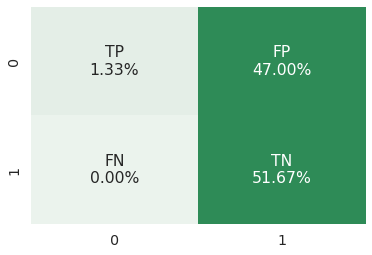

In [52]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('1-cenario-matriz-mlp.pdf', bbox_inches='tight')

In [53]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_mlp, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     1.0000    0.0276    0.0537       145
class 1: phishing     0.5236    1.0000    0.6874       155

         accuracy                         0.5300       300
        macro avg     0.7618    0.5138    0.3705       300
     weighted avg     0.7539    0.5300    0.3811       300



In [54]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_mlp)
test_ap = average_precision_score(y_test,y_test_mlp)
test_ac = accuracy_score(y_test, y_test_mlp.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.5138
Test Average Precision Score = 0.5236
Test Accuracy Score = 0.5300


In [55]:
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_mlp, y_test)
auc_roc = auc(fpr, tpr)

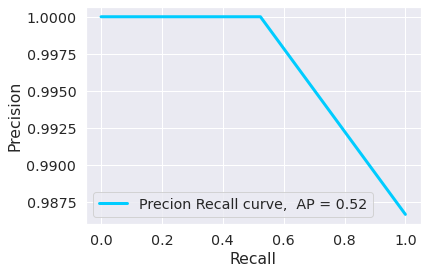

In [56]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
    
plt.savefig('pr-mlp.pdf', bbox_inches='tight')

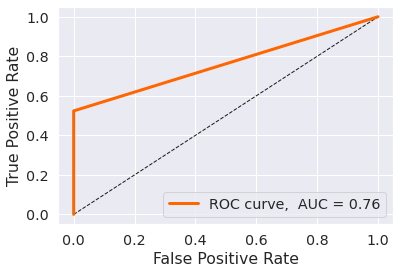

In [57]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('1-cenario-roc-mlp.pdf', bbox_inches='tight')

**4. XGBoost Classifier**

In [58]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

# get the start datetime
st = datetime.datetime.now()

#fit the model
xgb.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.239260 seconds


In [59]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.014934 seconds


In [60]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9914
XGBoost : Accuracy on test Data: 0.9067


In [61]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [62]:
cm = confusion_matrix(y_test,y_test_xgb)
cm

array([[130,  15],
       [ 13, 142]])

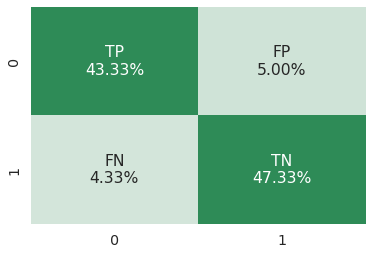

In [63]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('1-cenario-matriz-xgboost.pdf', bbox_inches='tight')

In [64]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_xgb, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9091    0.8966    0.9028       145
class 1: phishing     0.9045    0.9161    0.9103       155

         accuracy                         0.9067       300
        macro avg     0.9068    0.9063    0.9065       300
     weighted avg     0.9067    0.9067    0.9066       300



In [65]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_xgb)
test_ap = average_precision_score(y_test,y_test_xgb)
test_ac = accuracy_score(y_test, y_test_xgb.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9063
Test Average Precision Score = 0.8719
Test Accuracy Score = 0.9067


In [66]:
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_xgb, y_test)
auc_roc = auc(fpr, tpr)

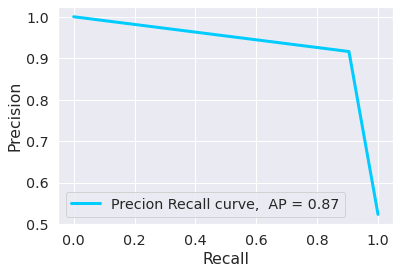

In [67]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()

plt.savefig('pr-xgboost.pdf', bbox_inches='tight')

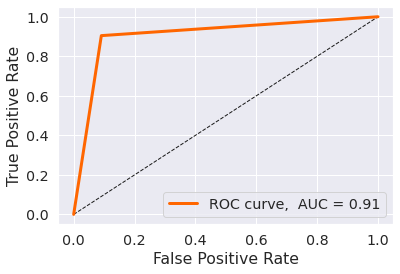

In [68]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('1-cenario-roc-xgboost.pdf', bbox_inches='tight')

**5. Support Vector Machines**

In [69]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# get the start datetime
st = datetime.datetime.now()

#fit the model
svm.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.217776 seconds


In [70]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.013076 seconds


In [71]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.4f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.4f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9314
SVM : Accuracy on test Data: 0.9067


In [72]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [73]:
cm = confusion_matrix(y_test,y_test_svm)
cm

array([[133,  12],
       [ 16, 139]])

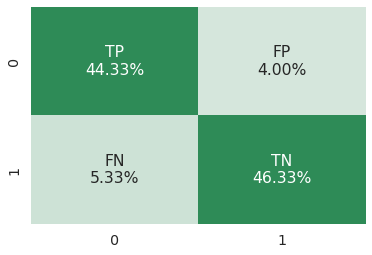

In [74]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('1-cenario-matriz-svm.pdf', bbox_inches='tight')

In [75]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_svm, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8926    0.9172    0.9048       145
class 1: phishing     0.9205    0.8968    0.9085       155

         accuracy                         0.9067       300
        macro avg     0.9066    0.9070    0.9066       300
     weighted avg     0.9070    0.9067    0.9067       300



In [76]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_svm)
test_ap = average_precision_score(y_test,y_test_svm)
test_ac = accuracy_score(y_test, y_test_svm.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9070
Test Average Precision Score = 0.8788
Test Accuracy Score = 0.9067


In [77]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_svm, y_test)
auc_roc = auc(fpr, tpr)

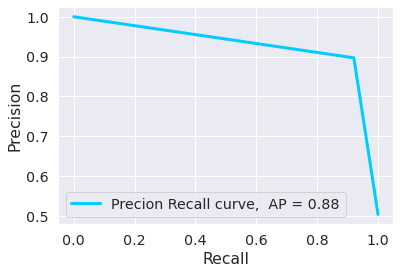

In [78]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-svm.pdf', bbox_inches='tight')

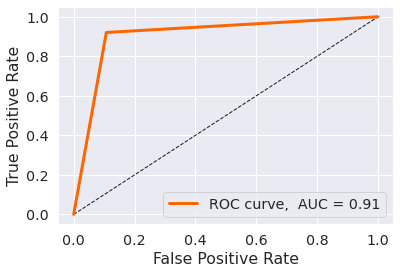

In [79]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('1-cenario-roc-svm.pdf', bbox_inches='tight')

**Comparision of Models**

In [80]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.950,0.900
1,Random Forest,0.936,0.897
2,Multilayer Perceptrons,0.500,0.530
3,XGBoost,0.991,0.907
4,SVM,0.931,0.907


In [81]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.991,0.907
4,SVM,0.931,0.907
0,Decision Tree,0.950,0.900
1,Random Forest,0.936,0.897
2,Multilayer Perceptrons,0.500,0.530
